### Step 1: Data Preprocessing

In the fisrt step we import the required packages. Then we load the dataset in csv format and clean and prepare it for the analysis:

1. **Handle Missing Values**: We drop rows with any missing values to ensure our analysis is based on complete data.
2. **Convert Date Column**: The 'Date' column is converted to a datetime format to facilitate time-based analysis.
3. **Feature Engineering**: We extract the year and month from the 'Date' column to create new features that can be used in our analysis.

This step is crucial as it ensures the dataset is clean and the features are in a suitable format for the subsequent analysis.

# Import packages, load the csv File and display the basic information of the dataset

Pandas: For data manipulation and analysis.
NumPy: For numerical operations and handling arrays.

In [1]:
# Import packages 
import pandas as pd
import numpy as np

# Load the dataset
file_path = r'C:\Users\patri\Desktop\Sandbox\fh_mtm_data\fh_mtm_data_projekt_group1\data_set_amazon_sale_report.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())

# Display the first lines of the dataset
print(data.head())

print(data.apply(pd.unique).to_frame(name='Unique Values'))
print(data.describe().T)

C:\Users\patri\AppData\Local\Temp\ipykernel_21624\1594947601.py:7: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

 **Handle Missing Values**

In [2]:
# Identify columns with null values
null_columns = data.columns[data.isnull().any()]

# Display columns with the count of null values
null_counts = data[null_columns].isnull().sum()
print(null_counts)

Courier Status       6872
currency             7795
Amount               7795
ship-city              33
ship-state             33
ship-postal-code       33
ship-country           33
promotion-ids       49153
fulfilled-by        89698
Unnamed: 22         49050
dtype: int64


Remove columns we dont need and the lines with null values and drop duplicates

In [3]:
# Remove columns with a large number of null values
columns_to_remove = ['promotion-ids', 'fulfilled-by', 'Unnamed: 22']
data_clean = data.drop(columns=columns_to_remove)

# Remove rows with null values in specific columns
columns_with_nulls = ['Courier Status', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country']
data_clean = data_clean.dropna(subset=columns_with_nulls)

# Verify the data cleaning steps
print(data_clean.info())
print(data_clean.head())


<class 'pandas.core.frame.DataFrame'>
Index: 116016 entries, 1 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               116016 non-null  int64  
 1   Order ID            116016 non-null  object 
 2   Date                116016 non-null  object 
 3   Status              116016 non-null  object 
 4   Fulfilment          116016 non-null  object 
 5   Sales Channel       116016 non-null  object 
 6   ship-service-level  116016 non-null  object 
 7   Style               116016 non-null  object 
 8   SKU                 116016 non-null  object 
 9   Category            116016 non-null  object 
 10  Size                116016 non-null  object 
 11  ASIN                116016 non-null  object 
 12  Courier Status      116016 non-null  object 
 13  Qty                 116016 non-null  int64  
 14  currency            116016 non-null  object 
 15  Amount              116016 non-null  fl

Remove all columns having only one value

In [4]:
# Count the number of different values per column
unique_values_per_column = data_clean.nunique()
print(unique_values_per_column)

index                 116016
Order ID              108271
Date                      91
Status                    12
Fulfilment                 2
Sales Channel              1
ship-service-level         2
Style                   1371
SKU                     7132
Category                   9
Size                      11
ASIN                    7128
Courier Status             2
Qty                        6
currency                   1
Amount                   867
ship-city               8499
ship-state                67
ship-postal-code        9142
ship-country               1
B2B                        2
dtype: int64


Delete all columns having only one value (Sales Channel= Amazon.in; Currency= INR; ship-country= IN)

In [5]:
# Remove columns with only on values
columns_to_remove = ['Sales Channel ', 'currency', 'ship-country']
data_clean = data_clean.drop(columns=columns_to_remove)

# Count the number of different values per column
unique_values_per_column = data_clean.nunique()
print(unique_values_per_column)

# Verify the data cleaning steps
print(data_clean.info())


index                 116016
Order ID              108271
Date                      91
Status                    12
Fulfilment                 2
ship-service-level         2
Style                   1371
SKU                     7132
Category                   9
Size                      11
ASIN                    7128
Courier Status             2
Qty                        6
Amount                   867
ship-city               8499
ship-state                67
ship-postal-code        9142
B2B                        2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 116016 entries, 1 to 128974
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               116016 non-null  int64  
 1   Order ID            116016 non-null  object 
 2   Date                116016 non-null  object 
 3   Status              116016 non-null  object 
 4   Fulfilment          116016 non-null  object 
 5   ship

**Data Cleaning** 

check the datatypes and in case change them

In [6]:
# Get the data types of all columns in the cleaned dataset
column_data_types = data_clean.dtypes
print(column_data_types)

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
B2B                      bool
dtype: object


In [7]:
# Convert the date an order into date format
data_clean['Date'] = pd.to_datetime(data_clean['Date'], format='%m-%d-%y')
# Change the status of an order into category as there are fixed values
data_clean['Status'] = data_clean['Status'].astype('category')
# Change the Fulfilment of an order into category after is only distribution via Merchant or Amazon possible
data_clean['Fulfilment'] = data_clean['Fulfilment'].astype('category')
# Change the Fulfilment of an order into category as there is only Standard or Expedited
data_clean['ship-service-level'] = data_clean['ship-service-level'].astype('category')
# Change the Category of an order into category as there are fixed types of goods
data_clean['Category'] = data_clean['Category'].astype('category')
# Change the Size of an order into category as there are fixed clothing sizes for the goods
data_clean['Size'] = data_clean['Size'].astype('category')
# Change the Courier Status of an order into category as there is only Shipped, Unshipped or Canceled possible
data_clean['Courier Status'] = data_clean['Courier Status'].astype('category')
# Change the ship-postal-code of an order into object as the values are postal codes
data_clean['ship-postal-code'] = data_clean['ship-postal-code'].astype('object') 
# Change the B2B information into bool as the values are either false or true
data_clean['B2B'] = data_clean['B2B'].astype('bool')

# Verify the updated data types
print(data_clean.dtypes)


index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                      category
Fulfilment                  category
ship-service-level          category
Style                         object
SKU                           object
Category                    category
Size                        category
ASIN                          object
Courier Status              category
Qty                            int64
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code              object
B2B                             bool
dtype: object


**Feature Engineering** 

Create new features if necessary, such as extracting month or year from the Date column.

- Day of the Week and Sepeation of Year & Month
    Extract the day of the week from the Date column to see if there are patterns related to specific days (e.g., higher sales on weekends).

In [8]:
# Feature Engineering: Extract month and year from 'Date'
data_clean['Year'] = data_clean['Date'].dt.year
data_clean['Month'] = data_clean['Date'].dt.month
data_clean['DayOfWeek'] = data_clean['Date'].dt.dayofweek


# Display cleaned data information
print(data_clean.info())
print(data_clean.head())

<class 'pandas.core.frame.DataFrame'>
Index: 116016 entries, 1 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               116016 non-null  int64         
 1   Order ID            116016 non-null  object        
 2   Date                116016 non-null  datetime64[ns]
 3   Status              116016 non-null  category      
 4   Fulfilment          116016 non-null  category      
 5   ship-service-level  116016 non-null  category      
 6   Style               116016 non-null  object        
 7   SKU                 116016 non-null  object        
 8   Category            116016 non-null  category      
 9   Size                116016 non-null  category      
 10  ASIN                116016 non-null  object        
 11  Courier Status      116016 non-null  category      
 12  Qty                 116016 non-null  int64         
 13  Amount              116016 non-nul

- Day of the Month
    Extract the day of the month to check for patterns related to specific days (e.g., end-of-month sales spikes).

In [9]:
data_clean['DayOfMonth'] = data_clean['Date'].dt.day

- Is Weekend
    Create a binary feature indicating whether a date falls on a weekend in order to see if there are patterns on weekends.

In [10]:
data_clean['IsWeekend'] = data_clean['DayOfWeek'].isin([5, 6])

- Region
    Segment the values in 'ship-state' into six regions of india 

In [11]:
# Change values into caps lock to fit to the maping rules
data_clean['ship-state'] = data_clean['ship-state'].str.upper()
print(data_clean['ship-state'].head())

1        KARNATAKA
2      MAHARASHTRA
4       TAMIL NADU
5    UTTAR PRADESH
6       CHANDIGARH
Name: ship-state, dtype: object


In [12]:
# List of states by region
north_states = ['JAMMU & KASHMIR', 'HIMACHAL PRADESH', 'Punjab', 'UTTARAKHAND', 'HARYANA', 'Delhi', 'UTTAR PRADESH', 'Chandigarh', 'LADAKH', 'New Delhi', 'PB', 'Punjab/Mohali/Zirakpur']
south_states = ['ANDHRA PRADESH', 'KARNATAKA', 'KERALA', 'TAMIL NADU', 'TELANGANA', 'Pondicherry', 'Puducherry', 'LAKSHADWEEP']
east_states = ['Bihar', 'JHARKHAND', 'Odisha', 'WEST BENGAL', 'ANDAMAN & NICOBAR ', 'Orissa']
west_states = ['Goa', 'Gujarat', 'MAHARASHTRA', 'DADRA AND NAGAR', 'RAJSHTHAN', 'RJ', 'RAJSTHAN', 'RAJASTHAN']
central_states = ['MADHYA PRADESH', 'CHHATTISGARH']
northeast_states = ['ARUNACHAL PRADESH', 'ASSAM', 'Manipur', 'MEGHALAYA', 'Mizoram', 'Nagaland', 'Sikkim', 'TRIPURA', 'AR', 'NL']

# Convert all state names to uppercase
north_states = [state.upper() for state in north_states]
south_states = [state.upper() for state in south_states]
east_states = [state.upper() for state in east_states]
west_states = [state.upper() for state in west_states]
central_states = [state.upper() for state in central_states]
northeast_states = [state.upper() for state in northeast_states]


# Function to get region
def get_region(state):
    if state in north_states:
        return 'North'
    elif state in south_states:
        return 'South'
    elif state in east_states:
        return 'East'
    elif state in west_states:
        return 'West'
    elif state in central_states:
        return 'Central'
    elif state in northeast_states:
        return 'Northeast'
    else:
        return 'Other'

# Applying the function to create a new column 'Region'
data_clean['Region'] = data_clean['ship-state'].apply(get_region)
print(data_clean.head())


   index             Order ID       Date                        Status  \
1      1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146 2022-04-30                       Shipped   
4      4  407-1069790-7240320 2022-04-30                       Shipped   
5      5  404-1490984-4578765 2022-04-30                       Shipped   
6      6  408-5748499-6859555 2022-04-30                       Shipped   

  Fulfilment ship-service-level    Style              SKU Category Size  ...  \
1   Merchant           Standard  JNE3781  JNE3781-KR-XXXL    kurta  3XL  ...   
2     Amazon          Expedited  JNE3371    JNE3371-KR-XL    kurta   XL  ...   
4     Amazon          Expedited  JNE3671  JNE3671-TU-XXXL      Top  3XL  ...   
5     Amazon          Expedited   SET264  SET264-KR-NP-XL      Set   XL  ...   
6     Amazon          Expedited    J0095      J0095-SET-L      Set    L  ...   

     ship-city     ship-state  ship-postal-code    B2B  Year Month DayOfWe

In [13]:
other_states = data_clean[data_clean['Region'] == 'Other']

# Print all state names where region is "Other"
print(other_states['ship-state'].tolist())

[]


- Order Size
    Calculate the total order size by multiplying Qty with the Amount (if each row represents a line item, otherwise directly use Amount).

In [14]:
data_clean['OrderSize'] = data_clean['Qty'] * data_clean['Amount']

- Price per Item
    Calculate the price per item if Qty and Amount represent total quantity and total amount.


In [15]:
data_clean['PricePerItem'] = data_clean['Amount'] / data_clean['Qty']

In [16]:
print(data_clean.apply(pd.unique).to_frame(name='Unique Values'))


                                                        Unique Values
index               [1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, ...
Order ID            [171-9198151-1101146, 404-0687676-7273146, 407...
Date                [2022-04-30T00:00:00.000000000, 2022-04-29T00:...
Status              ['Shipped - Delivered to Buyer', 'Shipped', 'C...
Fulfilment          ['Merchant', 'Amazon']
Categories (2, object):...
ship-service-level  ['Standard', 'Expedited']
Categories (2, objec...
Style               [JNE3781, JNE3371, JNE3671, SET264, J0095, JNE...
SKU                 [JNE3781-KR-XXXL, JNE3371-KR-XL, JNE3671-TU-XX...
Category            ['kurta', 'Top', 'Set', 'Western Dress', 'Ethn...
Size                ['3XL', 'XL', 'L', 'S', 'XXL', ..., '6XL', 'M'...
ASIN                [B09K3WFS32, B07WV4JV4D, B098714BZP, B08YN7XDS...
Courier Status      ['Shipped', 'Unshipped']
Categories (2, object...
Qty                                                [1, 2, 3, 5, 4, 8]
Amount              

In [17]:
# Save the cleaned dataset to a CSV file
data_clean.to_csv('clean_data_set_amazon_sale_report.csv', index=False)

**Data Analysis**
Perform analysis on this dataset using the following methods

Step 1: Data Preparation
First, let's handle any missing values and encode categorical variables.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Handle missing values (if any)
data_clean.fillna(method='ffill', inplace=True)

# Encode categorical variables
label_encoders = {}
for column in ['Status', 'Fulfilment', 'ship-service-level', 'Category', 'Region', 'Size', 'ASIN', 'Courier Status', 'ship-state', 'Date', 'Order ID', 'Style']:
    le = LabelEncoder()
    data_clean[column] = le.fit_transform(data_clean[column])
    label_encoders[column] = le

# Define features and target variable
features = data_clean.drop(columns=['Region', 'Date', 'Order ID', 'ASIN', 'Courier Status', 'ship-state', 'ship-city', 'SKU', 'ship-postal-code', 'index'])
target = data_clean['Region']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


C:\Users\patri\AppData\Local\Temp\ipykernel_21624\2852750357.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_clean.fillna(method='ffill', inplace=True)


((92812, 16), (23204, 16), (92812,), (23204,))

Step 2: Model Training
Now, we will train the Random Forest Classifier.

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Step 3: Model Evaluation
Finally, evaluate the model on the testing data.

In [39]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


Accuracy: 0.36101534218238235
Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.02      0.03       657
           1       0.13      0.08      0.09      2110
           2       0.28      0.26      0.27      4934
           3       0.10      0.05      0.06       510
           4       0.46      0.59      0.52      9417
           5       0.28      0.24      0.26      5576

    accuracy                           0.36     23204
   macro avg       0.22      0.21      0.21     23204
weighted avg       0.33      0.36      0.34     23204



Step 4: Visualization of Classification Results

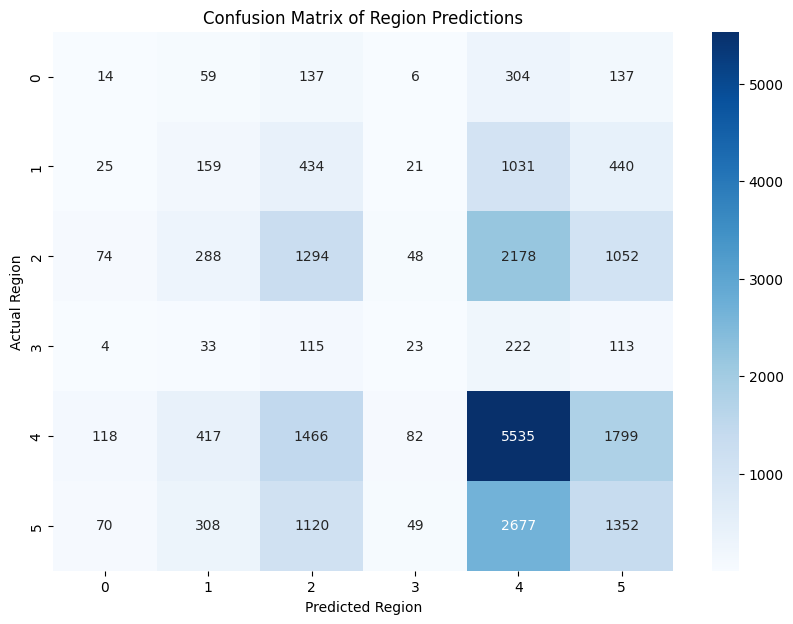

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Region'].classes_, yticklabels=label_encoders['Region'].classes_)
plt.xlabel('Predicted Region')
plt.ylabel('Actual Region')
plt.title('Confusion Matrix of Region Predictions')
plt.show()


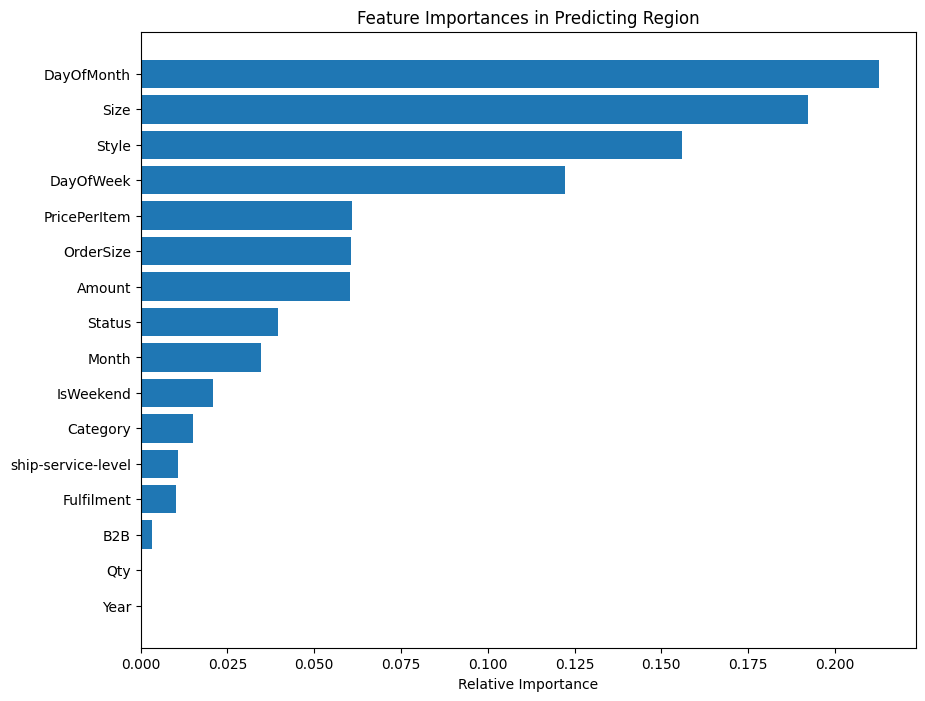

In [41]:
# Plot feature importances
feature_importances = rf_classifier.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]  # Sort in descending order

plt.figure(figsize=(10, 8))
plt.title('Feature Importances in Predicting Region')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()
